<a href="https://colab.research.google.com/github/Ankit-tiwary-26/Deep-Learning/blob/main/MNSIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


Loading the MNIST data from keras.datasets

In [2]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
#shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Taining Image = 60000 Images


Test Data=10000 Images


image dimension = 28x28

Grayscale Image = 1 channel

In [5]:
#priniting 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


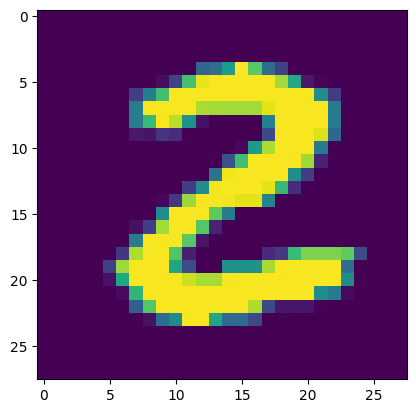

2


In [7]:
plt.imshow(X_train[25])
plt.show()
print(Y_train[25])

In [8]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [9]:
#unique values in Y_train and Y_test
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


All images must of same dimension so we will resize the image

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
#setting up the layers of the Neural Network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# compiling the Neural Network
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
#training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8558 - loss: 0.5035
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9538 - loss: 0.1547
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9674 - loss: 0.1094
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9747 - loss: 0.0849
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9783 - loss: 0.0693
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9822 - loss: 0.0572
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9856 - loss: 0.0484
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9868 - loss: 0.0426
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9895 - loss: 0.0351
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9905 - loss: 0.0318


Training data accuracy = 99.05%

Accuracy on test data

In [15]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9632 - loss: 0.1492
0.968500018119812


Test data accuracy=96.85%

In [16]:
print(X_test.shape)

(10000, 28, 28)


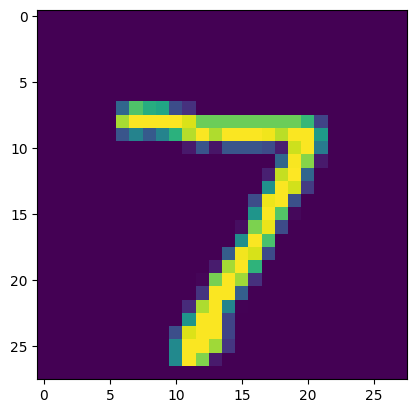

In [17]:
#first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [18]:
print(Y_test[0])

7


In [19]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step


In [20]:
print(Y_pred.shape)

(10000, 10)


In [21]:
print(Y_pred[0])

[9.1724925e-02 1.0129224e-01 8.0849290e-01 9.7409117e-01 1.9988478e-05
 1.1298297e-03 1.3333999e-10 1.0000000e+00 4.6925354e-03 9.9920499e-01]


In [22]:
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [23]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(8), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [24]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [25]:
print(conf_mat)

tf.Tensor(
[[ 955    0    1    1    0    1   10    0    4    8]
 [   0 1119    1    4    0    2    3    0    6    0]
 [   4    1  982   17    3    1    6    8    9    1]
 [   0    0    2  993    0    1    0    6    4    4]
 [   0    0    1    1  953    0   12    3    1   11]
 [   1    0    0   49    2  821    4    2   11    2]
 [   0    3    0    2    4    4  945    0    0    0]
 [   1    3    8    9    1    0    1  998    1    6]
 [   5    0    1   16    4    3    3    3  936    3]
 [   0    3    0    6   14    3    3    3    9  968]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

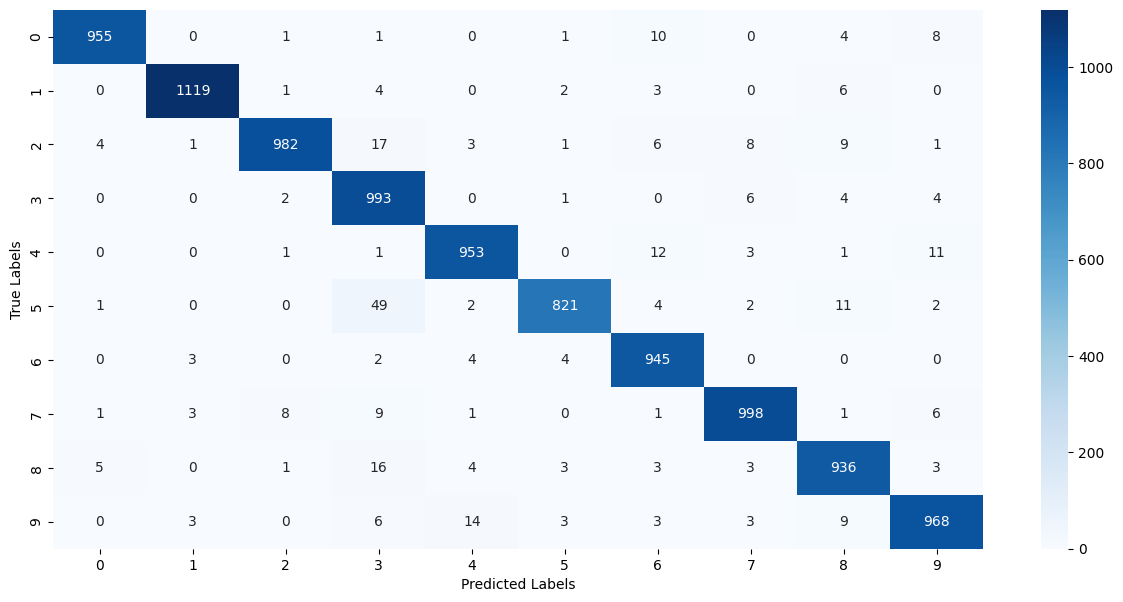

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [32]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [33]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [34]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


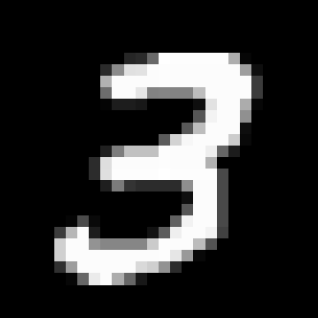

In [35]:
cv2_imshow(input_image)

In [36]:
input_image.shape

(318, 318, 3)

In [37]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [38]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [39]:
input_image_resize.shape

(28, 28)

In [40]:
cv2_imshow(input_image_resize)

In [41]:
input_image_resize = input_image_resize/255

In [42]:
type(input_image_resize)

numpy.ndarray

In [43]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [44]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[2.8264341e-07 3.4881781e-03 1.3936905e-03 1.0000000e+00 2.3935953e-12
  5.9820950e-01 4.5838682e-14 5.9058048e-06 9.5637298e-01 9.9947292e-01]]


In [45]:
input_pred_label = np.argmax(input_prediction)

In [46]:
print(input_pred_label)

3


Predictive System


Path of the image to be predicted: /content/mnist_0.webp


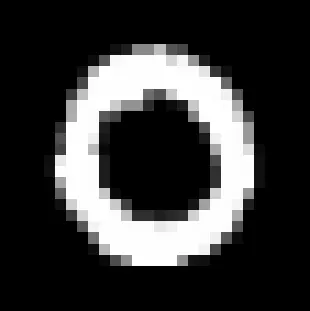

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The Handwritten Digit is recognised as  0


In [47]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)